# Importando modulo pandas

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import time

# Importando dataframe

In [16]:
dados_df = pd.read_csv("EPD_202204.csv", nrows=100, index_col=0)

# Ler dataframe

In [17]:
def df_dados():
    dados = "dados_df"
    if dados:
        return dados_df 
    return {'message': 'Dados invalidos.'}

display(df_dados()) 

,REGIONAL_OFFICE_NAME,REGIONAL_OFFICE_CODE,STP_NAME,STP_CODE,PCO_NAME,PCO_CODE,PRACTICE_NAME,PRACTICE_CODE,ADDRESS_1,ADDRESS_2,...,BNF_CODE,BNF_DESCRIPTION,BNF_CHAPTER_PLUS_CODE,QUANTITY,ITEMS,TOTAL_QUANTITY,ADQUSAGE,NIC,ACTUAL_COST,UNIDENTIFIED
YEAR_MONTH,,,,,,,,,,,,,,,,,,,,,
202204,EAST OF ENGLAND,Y61,NORFOLK & WAVENEY H&C PARTNERSHIP STP,QMM,NORFOLK AND WAVENEY CCG,26A00,BRIDGE ROAD SURGERY,D83011,THE SURGERY,"1A BRIDGE RD,OULTON BROAD",...,20030900229,Biatain Silicone Lite dressing 7.5cm x 7.5cm,20: Dressings,10.0,1,10.0,0,14.10,13.20571,N
202204,EAST OF ENGLAND,Y61,NORFOLK & WAVENEY H&C PARTNERSHIP STP,QMM,NORFOLK AND WAVENEY CCG,26A00,BRIDGE ROAD SURGERY,D83011,THE SURGERY,"1A BRIDGE RD,OULTON BROAD",...,20090000945,CliniFast stockinette 10.75cm,20: Dressings,10.0,1,10.0,0,12.36,11.57760,N
202204,EAST OF ENGLAND,Y61,NORFOLK & WAVENEY H&C PARTNERSHIP STP,QMM,NORFOLK AND WAVENEY CCG,26A00,BRIDGE ROAD SURGERY,D83011,THE SURGERY,"1A BRIDGE RD,OULTON BROAD",...,21010230115,AeroChamber Plus,21: Appliances,1.0,8,8.0,0,41.04,38.50015,N
202204,EAST OF ENGLAND,Y61,NORFOLK & WAVENEY H&C PARTNERSHIP STP,QMM,NORFOLK AND WAVENEY CCG,26A00,BRIDGE ROAD SURGERY,D83011,THE SURGERY,"1A BRIDGE RD,OULTON BROAD",...,21010230116,AeroChamber Plus with mask,21: Appliances,2.0,1,2.0,0,17.10,16.01279,N
202204,EAST OF ENGLAND,Y61,NORFOLK & WAVENEY H&C PARTNERSHIP STP,QMM,NORFOLK AND WAVENEY CCG,26A00,BRIDGE ROAD SURGERY,D83011,THE SURGERY,"1A BRIDGE RD,OULTON BROAD",...,21010230120,Able Spacer,21: Appliances,1.0,1,1.0,0,4.39,4.12010,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202204,NORTH EAST AND YORKSHIRE,Y63,"HUMBER, COAST & VALE STP",QOQ,VALE OF YORK CCG,03Q00,HAXBY GROUP PRACTICE,B82026,HAXBY GROUP PRACTICE,HAXBY/WIGGINTON HLTH CTR,...,20031700016,Flaminal Hydro gel dressing,20: Dressings,75.0,1,75.0,0,40.80,38.18878,N
202204,NORTH EAST AND YORKSHIRE,Y63,"HUMBER, COAST & VALE STP",QOQ,VALE OF YORK CCG,03Q00,HAXBY GROUP PRACTICE,B82026,HAXBY GROUP PRACTICE,HAXBY/WIGGINTON HLTH CTR,...,20120000100,Gauze swab type 13 light BP 1988 8ply non-ster...,20: Dressings,100.0,1,100.0,0,1.53,1.44401,N
202204,NORTH EAST AND YORKSHIRE,Y63,"HUMBER, COAST & VALE STP",QOQ,VALE OF YORK CCG,03Q00,HAXBY GROUP PRACTICE,B82026,HAXBY GROUP PRACTICE,HAXBY/WIGGINTON HLTH CTR,...,20120000110,Gauze swab type 13 light BP 1988 8ply sterile ...,20: Dressings,100.0,1,100.0,0,8.80,8.24652,N


# 10 produtos quimicos prescritos por regiao

In [126]:
def produtos_regiao():
    produtos_por_regiao = dados_df[['REGIONAL_OFFICE_NAME', 'CHEMICAL_SUBSTANCE_BNF_DESCR', 'TOTAL_QUANTITY']].groupby(['REGIONAL_OFFICE_NAME', 'CHEMICAL_SUBSTANCE_BNF_DESCR']).sum()
    return produtos_por_regiao

display(produtos_regiao())

TOTAL_QUANTITY
REGIONAL_OFFICE_NAME     CHEMICAL_SUBSTANCE_BNF_DESCR                      
EAST OF ENGLAND          Catheter Maintenance Products                120.0
                         Catheters                                    816.0
                         Dry Mouth Products                           150.0
                         Elastic Hosiery                               54.0
                         Other Appliances                            1429.0
                         Peak Flow Meters                              13.0
                         Stockinette                                   10.0
                         Venous Ulcer Compression System                4.0
                         Wound Management & Other Dressings            10.0
NORTH EAST AND YORKSHIRE Other Appliances                             201.0
                         Swabs                                        200.0
                         Wound Management & Other Dressings           505.0
NORTH WEST               Arm Sling/Bandages                            10.0
                         Catheter Maintenance Products               2100.0
                         Catheters                                    840.0
                         Dry Mouth Products                           250.0
                         Other Appliances                            4216.0
                         Stockinette                                   30.0
                         Surgical Adhesive Tape                        10.0
                         Swabs                                        300.0
                         Wound Management & Other Dressings           105.0

# Grafico de barra

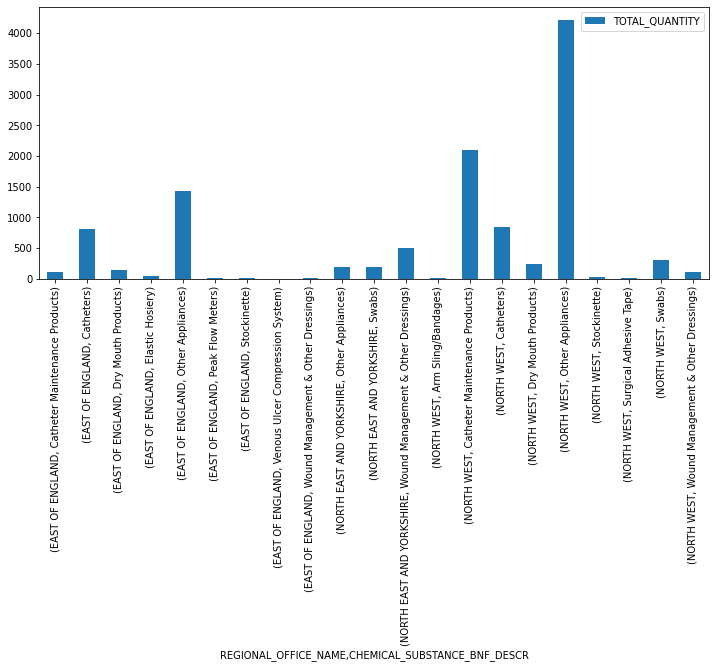

In [139]:
produtos_regiao().plot(kind='bar', figsize=(12,5))
plt.show()

# Produtos quimicos com maior somatoria de custo por mês: 10 primeiros

In [5]:
def somatoria():
    somatoria_custos = dados_df[['CHEMICAL_SUBSTANCE_BNF_DESCR', 'ACTUAL_COST']].groupby('CHEMICAL_SUBSTANCE_BNF_DESCR').sum()
    return somatoria_custos

display((somatoria()).sort_values('ACTUAL_COST', ascending=False).head(10))

,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,
Catheters,2961.12691
Wound Management & Other Dressings,731.19141
Other Appliances,412.18105
Elastic Hosiery,403.36461
Stockinette,243.30543
Catheter Maintenance Products,158.42566
Venous Ulcer Compression System,90.40060
Peak Flow Meters,58.32754
Dry Mouth Products,26.91646


# Prescrições mais comuns

In [ ]:
def comuns():
    prescricoes_comuns = dados_df[['BNF_DESCRIPTION','TOTAL_QUANTITY']].groupby('BNF_DESCRIPTION').sum()
    return prescricoes_comuns

display(comuns().sort_values(by='TOTAL_QUANTITY', ascending=False))

# Produto quimico que é mais prescrito por cada prescriber

In [ ]:
def mais_prescrito():
    produto_mais_prescrito = dados_df[['CHEMICAL_SUBSTANCE_BNF_DESCR', 
                                    'BNF_DESCRIPTION','TOTAL_QUANTITY']].groupby('CHEMICAL_SUBSTANCE_BNF_DESCR').sum()
    return produto_mais_prescrito

display(mais_prescrito().sort_values(by='TOTAL_QUANTITY', ascending=False))

# Quantidade de prescribers adicionados no ultimo mês

In [ ]:
def qtd_prescribers():
    prescribers_qtd = dados_df.groupby('BNF_DESCRIPTION').BNF_DESCRIPTION.count().sum()
    return prescribers_qtd

print(qtd_prescribers())

# Prescribers quem atuam em mais de uma região e ordenado por quantidade de região antendidas

# Preço medio dos produtos quimicos no ultimo mês coletado

In [ ]:
def preco():
    preco_medio = dados_df['ACTUAL_COST'].mean()
    return preco_medio

print(preco())

# Tabela com a prescrição de maior valor de cada usuario

In [ ]:
def valor_maior():
    maior_valor = dados_df[['BNF_DESCRIPTION', 'ACTUAL_COST']].groupby('BNF_DESCRIPTION').sum().max()
    return maior_valor
print(valor_maior())

# Rotina que mensalmente coleta dados do ultimo mês

In [ ]:
def rotina_mensal():
    while True:
        dados_df.to_csv('atual.csv')
        time.sleep(5)

display(rotina_mensal())